In [1]:
import datetime
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
stock = pd.read_csv("C:/AI/stock.csv")

In [3]:
stock

,일자,종목코드,종목명,거래량,시가,고가,저가,종가
0,20210601,A060310,3S,166690,2890,2970,2885,2920
1,20210601,A095570,AJ네트웍스,63836,5860,5940,5750,5780
2,20210601,A006840,AK홀딩스,103691,35500,35600,34150,34400
3,20210601,A054620,APS,462544,14600,14950,13800,14950
4,20210601,A265520,AP시스템,131987,29150,29150,28800,29050
...,...,...,...,...,...,...,...,...
987995,20230530,A189980,흥국에프엔비,272284,3005,3035,2955,2980
987996,20230530,A000540,흥국화재,50218,3250,3255,3195,3215
987997,20230530,A003280,흥아해운,130664,1344,1395,1340,1370
987998,20230530,A037440,희림,141932,9170,9260,9170,9200


In [4]:
stock.columns = ['Date', 'Code', 'Name', 'Volume', 'Open', 'High', 'Low','Close']

In [5]:
stock['Name'].value_counts()

Name
3S         494
유화증권       494
이녹스        494
이노테라피      494
이노와이어리스    494
          ... 
바이브컴퍼니     494
바이넥스       494
바른손이앤에이    494
바른손        494
힘스         494
Name: count, Length: 2000, dtype: int64

In [6]:
stock_Pr = stock[stock['Code']=='A054620']

In [7]:
stock_Pr = stock_Pr [['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]

In [8]:
stock_Pr

,Date,Open,High,Low,Close,Volume
3,20210601,14600,14950,13800,14950,462544
2003,20210602,14950,15250,14400,14500,168599
4003,20210603,14500,14700,14100,14550,204621
6003,20210604,14450,14650,14200,14250,84634
8003,20210607,14250,14900,13900,14900,201245
...,...,...,...,...,...,...
978003,20230523,11500,11580,10910,11180,523799
980003,20230524,11180,11360,10650,10700,175402
982003,20230525,10700,11900,10700,11250,449624
984003,20230526,11300,11800,11020,11150,128997


In [9]:
stock_Pr['Date'].value_counts()

Date
20210601    1
20221017    1
20221013    1
20221012    1
20221011    1
           ..
20220120    1
20220119    1
20220118    1
20220117    1
20230530    1
Name: count, Length: 494, dtype: int64

In [10]:
def MinMaxScaler(data):
    """최솟값과 최댓값을 이용하여 0 ~ 1 값으로 변환"""
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # 0으로 나누기 에러가 발생하지 않도록 매우 작은 값(1e-7)을 더해서 나눔
    return numerator / (denominator + 1e-7)

In [11]:
dfx = stock_Pr[['Open','High','Low','Volume', 'Close']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['Close']]
dfx = dfx[['Open','High','Low','Volume']]
dfx

,Open,High,Low,Volume
3,0.444077,0.455446,0.421405,0.225363
2003,0.467240,0.475248,0.461538,0.079380
4003,0.437459,0.438944,0.441472,0.097269
6003,0.434150,0.435644,0.448161,0.037680
8003,0.420913,0.452145,0.428094,0.095593
...,...,...,...,...
978003,0.238915,0.233003,0.228094,0.255784
980003,0.217737,0.218482,0.210702,0.082758
982003,0.185970,0.254125,0.214047,0.218946
984003,0.225678,0.247525,0.235452,0.059712


In [12]:
dfx.describe()

,Open,High,Low,Volume
count,494.000000,494.000000,494.000000,494.000000
mean,0.370041,0.383290,0.373917,0.057842
std,0.198733,0.206315,0.193206,0.090380
min,0.000000,0.000000,0.000000,0.000000
25%,0.245698,0.254125,0.254181,0.017957
50%,0.338187,0.346535,0.346154,0.034123
75%,0.467075,0.471452,0.461538,0.063309
max,1.000000,1.000000,1.000000,1.000000


In [13]:
# 두 데이터를 리스트 형태로 저장
X = dfx.values.tolist()
y = dfy.values.tolist()

In [14]:
#순차 훈련 데이터로 - 1
window_size = 10

data_X = []
data_y = []
for i in range(len(y) - window_size):
    _X = X[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_X.append(_X)
    data_y.append(_y)
print(_X, "->", _y)

[[0.24619457312874787, 0.24422442244063217, 0.24882943143646266, 0.032060259680403984], [0.2395764394424912, 0.24224422442084326, 0.2548494983260545, 0.019701005983455123], [0.23295830575623455, 0.2726072607242732, 0.2615384615367121, 0.02594171891264661], [0.2375909993366142, 0.22640264026253198, 0.11371237458117918, 0.6206931829920151], [0.10853739245460928, 0.11353135313456414, 0.05953177257485263, 0.44387927403908894], [0.08007941760370563, 0.2277227722757246, 0.10702341137052157, 0.9999999999999504], [0.23891462607386554, 0.233003300328495, 0.22809364548342412, 0.25578430554561016], [0.21773659827784422, 0.21848184818337635, 0.21070234113571434, 0.08275823023194422], [0.18596955658381223, 0.2541254125395767, 0.21404682274104314, 0.21894641906440862], [0.22567835870135222, 0.2475247524736137, 0.23545150501514747, 0.059711892218325645]] -> [0.22721268163654415]


In [15]:
#순차 훈련 데이터로 - 2 (함수로)
#def make_sample(data, window) :
#    train = []
#    target = []
#    for i in range(len(data)-window):
#        train.append(data[i:i+window])
#        train.append(data[i+window])
#    return np.array(train), np,array(target)

In [16]:
print('전체 데이터의 크기 :', len(data_X), len(data_y))

전체 데이터의 크기 : 484 484


In [17]:
train_size = int(len(data_y) * 0.7)
train_X = np.array(data_X[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_X = np.array(data_X[train_size : len(data_X)])
test_y = np.array(data_y[train_size : len(data_y)])

print('훈련 데이터의 크기 :', train_X.shape, train_y.shape)
print('테스트 데이터의 크기 :', test_X.shape, test_y.shape)

훈련 데이터의 크기 : (338, 10, 4) (338, 1)
테스트 데이터의 크기 : (146, 10, 4) (146, 1)


In [18]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RNN, SimpleRNN

In [19]:
model = Sequential()
model.add(LSTM(units=16, activation='relu', return_sequences=True, input_shape=(10, 4)))
model.add(Dropout(0.1))
model.add(LSTM(units=20, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()

C:\Users\tpfzl\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 10, 16)              │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 10, 16)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 20)                  │           2,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,325 (16.89 KB)

 Trainable params: 4,325 (16.89 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_X, train_y, epochs=70, batch_size=30)
pred_y = model.predict(test_X)

Epoch 1/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.1583
Epoch 2/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1160
Epoch 3/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0436
Epoch 4/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0236
Epoch 5/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0182 
Epoch 6/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0193 
Epoch 7/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0108
Epoch 8/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0129
Epoch 9/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0139 
Epoch 10/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0108
Epoch 11/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0113 
Epoch 12/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0130
Epoch 13/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0108
Epoch 14/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0098
Epoch 15/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0123
Epoch 16/70
12/

In [21]:
model.evaluate(test_X, test_y)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0023  


0.0025551151484251022

In [22]:
y_pred = model.predict(test_X)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [23]:
mse = tf.reduce_mean(tf.square(test_y - y_pred))

print(f'MSE: {mse.numpy()}')

MSE: 0.0023958629151842694


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  


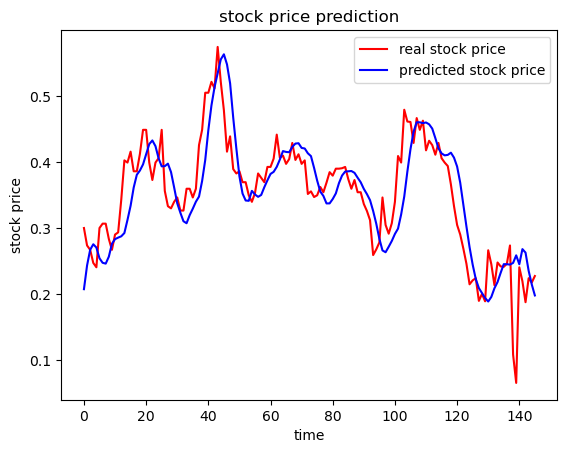

In [24]:
pred_y = model.predict(test_X)

plt.figure()
plt.plot(test_y, color='red', label='real stock price')
plt.plot(pred_y, color='blue', label='predicted stock price')
plt.title('stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()
